In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import factorial
from itertools import product, combinations


In [78]:
#calculating alfa 

alpha=(0+8+9)%6
alpha

5

In [103]:
#1.a) 
probability = ((factorial(4) / factorial(3)) * (factorial(13) / (factorial(6) * factorial(7)))) / (factorial(52) / (factorial(45) * factorial(7)))
probability

5.1306368986077315e-05

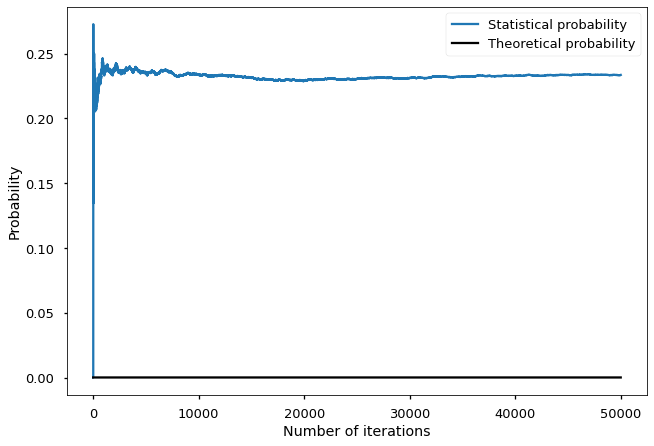

In [111]:
N=50000
P_A = []
N_A = 0

for i in range(0, N):
    index = np.random.choice(52, size=(alpha + 2), replace=False)
    if index[0]%4 == index[1]%4:
        N_A+=1
    P_A.append(N_A / (i+1))
    
plt.xlabel('Number of iterations')
plt.ylabel('Probability')
plt.plot(np.arange(1, N+1), P_A, label = 'Statistical probability')
    
plt.plot(range(0, N), [probability] * N, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
plt.show()

In [81]:
data = pd.read_csv("student-por.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [82]:
#2.
attributes = ["G3", "Fedu"]
stud = data[attributes]
stud.head()

,G3,Fedu
0,11,4
1,11,1
2,12,1
3,14,2
4,13,3


In [83]:
#a)
data_temp=(stud['G3']>(alpha+5) & (stud['G3']<(alpha+15))).value_counts()
data_temp

True     634
False     15
Name: G3, dtype: int64

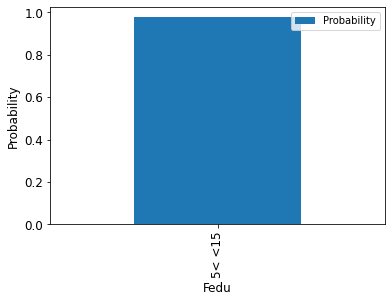

        Probability
5< <15     0.976888


In [84]:
P_2A=pd.DataFrame([data_temp[True]])/len(data)
P_2A.index = ["5< <15"]
P_2A.columns = ["Probability"]

P_2A.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Fedu",fontsize=12)
plt.show()
print(P_2A)

In [85]:
#b)
data_temp1=(stud['Fedu']<3).value_counts()
data_temp1

True     390
False    259
Name: Fedu, dtype: int64

In [86]:
data_temp2=(stud['Fedu']==3).value_counts()
data_temp2

False    518
True     131
Name: Fedu, dtype: int64

In [87]:
data_temp3=(stud['Fedu']>3).value_counts()
data_temp3

False    521
True     128
Name: Fedu, dtype: int64

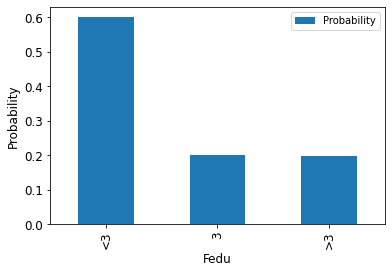

    Probability
<3     0.600924
3      0.201849
>3     0.197227


In [88]:
P_2B=pd.DataFrame([data_temp1[True], data_temp2[True],data_temp3[True]])/len(data)
P_2B.index = ["<3","3",">3"]
P_2B.columns = ["Probability"]

P_2B.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Fedu",fontsize=12)
plt.show()
print(P_2B)

In [89]:
#c)
temp=(stud["Fedu"]>3).value_counts()
temp

False    521
True     128
Name: Fedu, dtype: int64

In [90]:
data_temp4=((stud["Fedu"]>3) & (stud["G3"]>(alpha + 5)) & (stud["G3"]<(alpha + 15))).value_counts()
data_temp4

False    542
True     107
dtype: int64

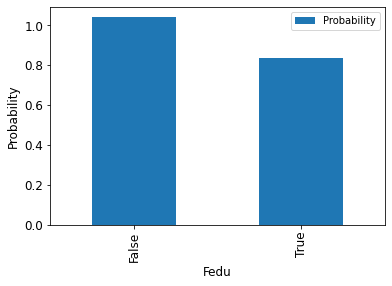

       Probability
False     1.040307
True      0.835938


In [91]:
P_2C=pd.DataFrame(data_temp4/temp)
P_2C.columns = ["Probability"]

P_2C.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Fedu",fontsize=12)
plt.show()
print(P_2C)

In [92]:
P_2C=pd.DataFrame([data_temp1[True], data_temp2[True],data_temp3[True]])/len(data)

In [93]:
#d)
P_2D=pd.DataFrame(P_2C*P_2A/P_2B.loc['>3'])
P_2D.columns = ["Probability"]

P_2D.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Fedu",fontsize=12)
plt.show()
print(P_2D)




ValueError: ignored

In [95]:
plt.style.use('seaborn-talk')
df1 = pd.read_csv("pressure.csv")
print(df1.columns)
df1.head()

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1009.0,1011.0,1012.0,1010.0,1014.0,1005.0,1011.0,1006.0,1016.0,1009.0,1012.0,1011.0,1015.0,1012.0,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [97]:
city = ['New York']
df = pd.read_csv("pressure.csv",usecols=city)
df.head()

,New York
0,NaN
1,1012.0
2,1012.0
3,1012.0
4,1012.0


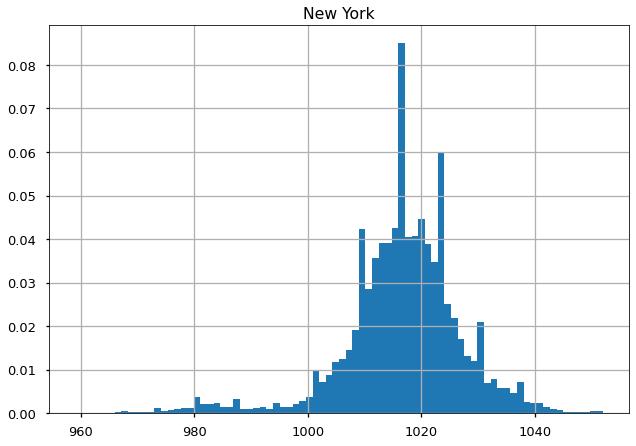

In [98]:
hist = df.hist(density=True,bins=80)
plt.show()

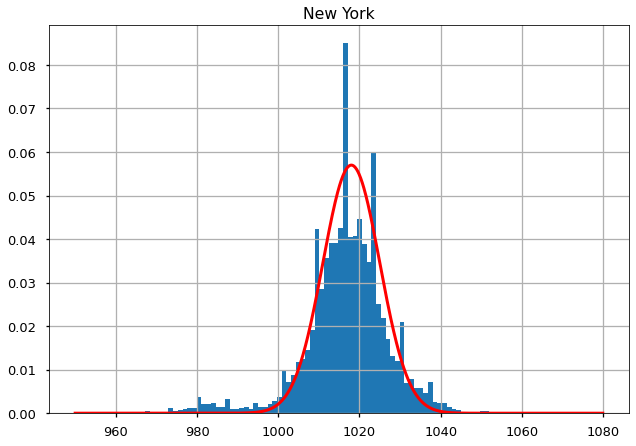

In [100]:
from scipy.stats import norm
hist = df.hist(density=True,bins=80)

step=0.1
x = np.arange(950, 1080, step)
m=1018
sig=7
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'r', linewidth=3.0)
plt.show()